<a href="https://colab.research.google.com/github/tomektom10/dataScienceBootCamp/blob/main/18_09_model_%2Bulepszenia_pojedyncze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [919]:
# pip install bayesian-optimization

In [920]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [921]:
#  import pandas as pd
# import pandas as pd
# import numpy as np
# df = pd.read_excel("DANE_KRZYCHU_całe.xlsx")

In [922]:

df_12 = df[df['Hour'] == 21]



In [923]:
#missing_per_column = df.isna().sum()
#missing_per_column

In [924]:
#futures=['SK Residual Production Backcast', "SK Residual Load Backcast", 'Weighted average price of all trades (EUR/MWh)'  ]

In [925]:
target = df_12['Weighted average price of all trades (EUR/MWh)'].values

In [926]:
input = df_12[[
              "Hour",
              "Day",
              "SK Price Spot EUR/MWh OKTE ",
             'SK Nuclear Production MWh/h H Actual',
             'SK Hydro Run-of-river Production MWh/h H Actual',
             'SK Natural Gas Power Production MWh/h H Actual',
              "SK Solar Photovoltaic Production MWh/h H Actual",
              "SK Hydro Pumped-storage Production MWh/h H Actual",
              'SK Other Power Production MWh/h H Actual',
              'SK Hydro Reservoir Production MWh/h H Actual',
             "SK Consumption MWh/h H Actual",
             'SK Exchange Physical Flow Net Import MWh/h H Actual',
             "Weighted average price of all trades (EUR/MWh)"]].values







In [927]:
scaler = MinMaxScaler()

futures_scaled = scaler.fit_transform(input)




In [928]:
# Create sequences for LSTM
def create_sequences(data, window_size, prediction_size):
    X = []
    y = []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + prediction_size, -1])  # Predicting only the price
    return np.array(X), np.array(y)

In [929]:
#liczbs godzina na bazie ktorych generujemy predykcje
window_size = 20

prediction_size = 1

In [930]:
X,y = create_sequences (futures_scaled, window_size, prediction_size)

In [931]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [932]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (586, 20, 13)
Shape of y_train: (586, 1)


In [933]:
# from bayes_opt import BayesianOptimization
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# import numpy as np

# def build_and_evaluate_lstm(window_size, lstm_units, dropout_rate, learning_rate):
#     # Ensure the hyperparameters are in the correct format
#     window_size = int(window_size)
#     lstm_units = int(lstm_units)

#     # Create sequences with the specified window size
#     X, y = create_sequences(futures_scaled, window_size, prediction_size)
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Build the LSTM model
#     model = Sequential()
#     model.add(LSTM(units=lstm_units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units=prediction_size))

#     # Compile the model
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')

#     # Train the model
#     history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

#     # Return the validation loss
#     val_loss = history.history['val_loss'][-1]
#     return -val_loss

In [934]:
# # Define the parameter space for optimization
# param_bounds = {
#     'window_size': (10, 100),       # The range for window size
#     'lstm_units': (10, 100),        # The range for LSTM units
#     'dropout_rate': (0.1, 0.5),     # The range for dropout rate
#     'learning_rate': (0.0001, 0.01) # The range for learning rate
# }

# # Perform Bayesian optimization
# optimizer = BayesianOptimization(
#     f=build_and_evaluate_lstm,
#     pbounds=param_bounds,
#     random_state=42,
#     verbose=2
# )

# optimizer.maximize(init_points=5, n_iter=20)

# # Extract the best parameters
# best_params = optimizer.max['params']
# best_window_size = int(best_params['window_size'])
# best_lstm_units = int(best_params['lstm_units'])
# best_dropout_rate = best_params['dropout_rate']
# best_learning_rate = best_params['learning_rate']

# print("Best Parameters:")
# print(f"Window Size: {best_window_size}")
# print(f"LSTM Units: {best_lstm_units}")
# print(f"Dropout Rate: {best_dropout_rate}")
# print(f"Learning Rate: {best_learning_rate}")

In [935]:
# # Przekształcenie danych do formatu akceptowalnego przez LSTM (próbki, kroki czasowe, cechy)
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# # X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [936]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [937]:
# Inicjalizacja modelu LSTM
model = Sequential()

# Dodanie warstwy LSTM
model.add(LSTM(units=82, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Dodanie kolejnej warstwy LSTM
#model.add(LSTM(units=2, return_sequences=False))
#model.add(Dropout(0.2))

# Dodanie warstwy wyjściowej
model.add(Dense(units = prediction_size))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [938]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error')

# Wyświetlenie architektury modelu
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 82)                  │          31,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 82)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              83 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,571 (123.32 KB)

 Trainable params: 31,571 (123.32 KB)

 Non-trainable params: 0 (0.00 B)

In [939]:
# Trenowanie modelu LSTM
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0276 - val_loss: 0.0540
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0103 - val_loss: 0.0627
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - val_loss: 0.0631
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0570
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0583
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0555
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0522
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - val_loss: 0.0545
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0549
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0511
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0537
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

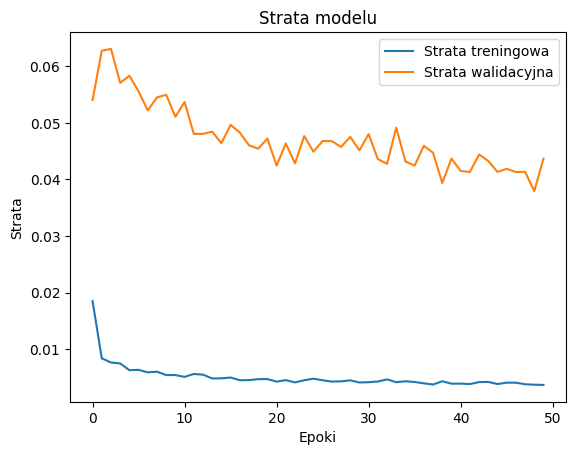

In [940]:
# Wykres strat treningowych i walidacyjnych
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Strata modelu')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [941]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0437
Test Loss: 0.0436779260635376


In [942]:
# Make predictions
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


In [943]:
y_test_24 = y_test[:, -1]

In [944]:
predictions_24 = predictions[:, -1]

In [945]:
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_test_24.shape[0], 12)), y_test_24.reshape(-1, 1)], axis=1))[:, -1]


In [946]:
np.concatenate([np.zeros((y_test.shape[0], 12)), y_test],axis=1).shape

(6, 13)

In [947]:
np.zeros((y_test.shape[0], 12)).shape

(6, 12)

In [948]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions_24.shape[0], 12)), predictions_24.reshape(-1, 1)], axis=1))[:, -1]

In [949]:
predictions_rescaled

array([151.27339405, 327.71098216,  94.27948904, 174.25649941,
       405.93183786, 147.47227117])

In [950]:
# y_test_rescaled = scaler.inverse_transform(y_test)



In [951]:
# # Plot true vs predicted prices for the next 24 hours
# plt.figure(figsize=(10, 6))
# plt.plot(y_test_24[:100], label='True Prices')
# plt.plot(predictions_24[:100], label='Predicted Prices')
# plt.title('True vs Predicted Prices for the Next 24 Hours')
# plt.xlabel('Time Steps')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [952]:
true_24th = y_test[:, -1]        # True values for the 24th hour
predicted_24th = predictions[:, -1]  # Predicted values for the 24th hour

In [953]:
percent_errors = np.abs(true_24th - predicted_24th) / np.abs(true_24th) * 100

In [954]:
sr_blad = np.mean(percent_errors)

In [955]:
sr_blad

46.865393812125006

In [956]:
##### do zmiany parametrow sieciu moge zmienic size okna, liczbe unit do danych,

In [957]:
percent_errors = np.abs(y_test_24 - predictions_24) / np.abs(y_test_24) * 100

In [958]:
sr_blad_real = np.mean(percent_errors)

In [959]:
sr_blad_real

46.865393812125006

In [960]:
###### WPROWADZANIE REALNYCH WARTOSCI

In [961]:
#X_test[-1]

In [962]:
predictions = model.predict(np.array([X_test[-1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [963]:
predictions.shape

(1, 1)

In [964]:
predictions_24 = np.array([predictions[:, -1]])

In [965]:
predictions_24.shape

(1, 1)

In [966]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions_24.shape[0], 12)), predictions_24.reshape(-1, 1)], axis=1))[:, -1]

In [967]:
predictions_rescaled

array([147.47227117])

In [968]:
#wczytywanie realnych danych

In [969]:
# df1 = pd.read_excel("swierze_wszystkie_zmienne+average.xlsx")

In [970]:
df1= df1[[     "Hour",
              "Day",
              "SK Price Spot EUR/MWh OKTE ",
             'SK Nuclear Production MWh/h H Actual',
             'SK Hydro Run-of-river Production MWh/h H Actual',
             'SK Natural Gas Power Production MWh/h H Actual',
              "SK Solar Photovoltaic Production MWh/h H Actual",
              "SK Hydro Pumped-storage Production MWh/h H Actual",
             'SK Other Power Production MWh/h H Actual',
             'SK Hydro Reservoir Production MWh/h H Actual',
             "SK Consumption MWh/h H Actual",
             'SK Exchange Physical Flow Net Import MWh/h H Actual',
             "Weighted average price of all trades (EUR/MWh)"]]


In [971]:
df_numeryczny = df1[df1["Hour"]==21]


In [972]:
probka = df_numeryczny.values

In [973]:
probka_scaled = scaler.transform(probka)

In [974]:
probka_scaled.shape

(619, 13)

In [975]:
predictions = model.predict(np.array([probka_scaled]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [976]:
predictions.shape

(1, 1)

In [977]:
predictions = predictions.reshape(1)

In [978]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], 12)), predictions.reshape(-1, 1)], axis=1))[:, -1]

In [979]:
predictions_rescaled

array([108.40427082])

In [980]:
# Przekształcamy tablicę na pionowy format
def make_vertical(arr):
    if arr.ndim == 1:
        arr = arr.reshape(-1, 1)
    return arr

# Uzyskujemy pionowy format
predictions_vertical = make_vertical(predictions_rescaled)

# Wyświetlamy tablicę pionowo bez nawiasów
for value in predictions_vertical:
    print(value[0])

108.40427081942559
